# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산

$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

### 로지스틱 함수
- 0과 1사이의 실수를 반환
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)**

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

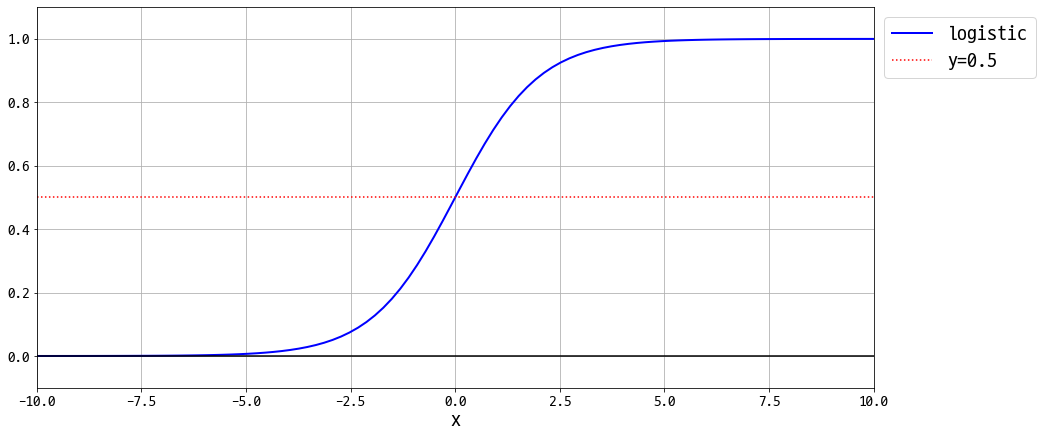

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-xx))

plt.figure(figsize=(15, 7))

# plt.plot(xx,xx, color='g', label='linear')
plt.plot(xx, sig, color='b', linewidth=2, label="logistic")

plt.plot([-10, 10], [0, 0], color='k', linestyle='-')
plt.plot([-10, 10], [0.5, 0.5], color='r', linestyle=':', label='y=0.5')

plt.xlabel("x")
plt.legend(bbox_to_anchor=(1,1), fontsize=20)
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

## LogisticRegression의 손실 함수(Loss Function)
- **Cross Entropy(로그손실-log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 도출
        - 확률이 틀리면 틀릴수록 손실값을 크게 만들기 위해서 log를 취함


$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - Logistic 함수를 이용한 추론 결과에 대한 cross entropy 계산
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일 때, 1일 때 계산하는 것이 다름. 그것을 하나의 공식으로 정의한 것이 binary cross entropy
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값,\quad\hat{p}:\:예측확률
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 증가 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적

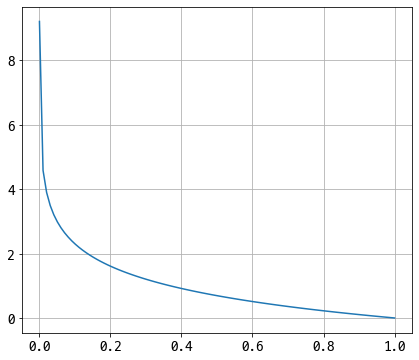

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0.0001,1,100)
y = -np.log(X)
plt.figure(figsize=(7,6))
plt.plot(X, y)
plt.grid(True)
plt.show()

## 최적화 
- 위 손실을 가장 적게하는 W(가중치)를 탐색 
- 로그 손실함수는 loss의 최소값으로 하는 parameter 찾는 정규방적식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같츰
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

## LogisticRegression 주요 하이퍼 파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강함
- max_iter(기본값 100) : 경사하강법 반복횟수

## 예제

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [4]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 평가함수

In [6]:
def print_metrics(y, y_pred, title=None):
    if title:
        print(title)
    print(f'정확도: {accuracy_score(y, y_pred)}, \
            재현율(recall): {recall_score(y, y_pred)}, \
            정밀도(precision): {precision_score(y, y_pred)}, \
            F1점수: {f1_score(y, y_pred)}')

##### 모델 생성, 학습, 추론, 평가

In [7]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [8]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

In [9]:
print_metrics(y_train, pred_train)

정확도: 0.9906103286384976,             재현율(recall): 0.9962546816479401,             정밀도(precision): 0.9888475836431226,             F1점수: 0.9925373134328358


In [10]:
print_metrics(y_test, pred_test)

정확도: 0.965034965034965,             재현율(recall): 0.9777777777777777,             정밀도(precision): 0.967032967032967,             F1점수: 0.9723756906077348


##### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C

In [11]:
param = {
    'C':[0.001, 0.01, 0.1, 1]
}
gs = GridSearchCV(LogisticRegression(random_state=0), 
                  param,
                  cv=5, 
                  scoring='accuracy', 
                  n_jobs=-1)

In [12]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, scoring='accuracy')

In [13]:
gs.best_params_

{'C': 1}

In [14]:
best_model = gs.best_estimator_
pred_test = best_model.predict(X_test_scaled)
accuracy_score(y_test, pred_test)

0.965034965034965